Esta vez probamos a:

- quitar la columna Delay
- modificar parametros del KNeighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas para regresiones
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regresores
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("Data/MeneosCompleto.csv", delimiter=";")

pd.set_option("display.precision", 7)

df.head(3)

,Titular,Medio,URL,Enviado,Publicado,Meneos,Clicks,Positivos,Anonimos,Negativos,Comentarios,Karma
0,Que arresten a los líderes de Israel por críme...,ctxt.es,https://old.meneame.net/story/arresten-lideres...,1715371648.0,1715379303.0,81,111.0,51.0,30.0,4.0,11.0,463.0
1,El pelotazo de los curas salesianos con una pi...,elsaltodiario.com,https://old.meneame.net/story/pelotazo-curas-s...,1715367709.0,1715377802.0,73,336.0,43.0,30.0,3.0,20.0,441.0
2,Países Bajos no participa en el segundo ensayo...,hoy.es,https://old.meneame.net/story/paises-bajos-no-...,1715374020.0,1715375703.0,123,1275.0,72.0,51.0,3.0,39.0,460.0


In [3]:
def limpieza_datos(df):
    #Limpieza de duplicados
    df.drop_duplicates()

    #Elimina las filas con valores NaN de las columnas que no son Clicks.
    lista_columnas = df.columns.to_list()
    lista_columnas.remove("Clicks")

    for columna in lista_columnas:
        lista_indices = df[df[columna].isna() == True].index.tolist()
        df = df.drop(index = lista_indices)
    
    #Eliminación de columnas innecesarias
    df = df.drop(columns=["Medio", "Positivos", "Anonimos", "Publicado", "Enviado"], axis=1)
    
    # Separamos nuestro dataframe en uno de train, test y otro de predicción
    df_tt = df[df["Clicks"].isna() == False]

    df_pred = df[df["Clicks"].isna() == True]
    df_pred.to_csv("Data/Datos_Pred.csv", index=False)

    # Eliminación de outliers
    df_tt = df_tt[df_tt["Meneos"].between(50, 3000)]
    df_tt = df_tt[df_tt["Negativos"] <= 13]
    df_tt = df_tt[df_tt["Comentarios"].between(10, 150)]
    df_tt = df_tt[df_tt["Karma"].between(230, 700)]
    df_tt = df_tt[df_tt["Clicks"].between(263, 37946)]


    # Guardamos nuestro dataframe de train, test
    df_tt.to_csv("Data/Datos_TrainTest.csv", index=False)

    return(df_tt)

In [4]:
df_tt = limpieza_datos(df)

In [9]:
df_tt.head()

,Titular,URL,Meneos,Clicks,Negativos,Comentarios,Karma
1,El pelotazo de los curas salesianos con una pi...,https://old.meneame.net/story/pelotazo-curas-s...,73,336.0,3.0,20.0,441.0
2,Países Bajos no participa en el segundo ensayo...,https://old.meneame.net/story/paises-bajos-no-...,123,1275.0,3.0,39.0,460.0
3,Todos los israelíes están entrenados en hasbar...,https://old.meneame.net/story/todos-israelies-...,117,1256.0,5.0,24.0,410.0
4,Cuando Einstein llamó “fascistas” a los gobern...,https://old.meneame.net/story/cuando-einstein-...,260,415.0,2.0,17.0,461.0
5,"Vetiver: conoce qué es, para qué sirve, usos y...",https://old.meneame.net/story/vetiver-conoce-s...,64,595.0,1.0,34.0,436.0


## OUTLIERS ##

# Meneos #

In [10]:
def plot_numeric(df_tt, feature, transform=None):
    fig, ax = plt.subplots(1,2, figsize=(14,4))
    
    if transform == False or transform == None:
        sns.histplot(df[feature], ax=ax[0])
        sns.boxplot(x=df[feature], ax=ax[1])
    else:
        sns.histplot(df[feature].apply(transform), ax=ax[0])
        sns.boxplot(x=df[feature].apply(transform), ax=ax[1])
    

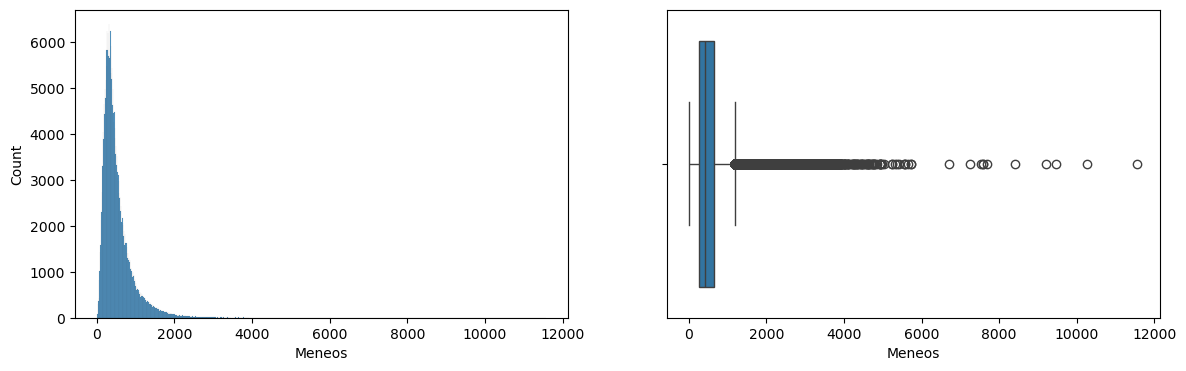

In [11]:
plot_numeric(df_tt, "Meneos")

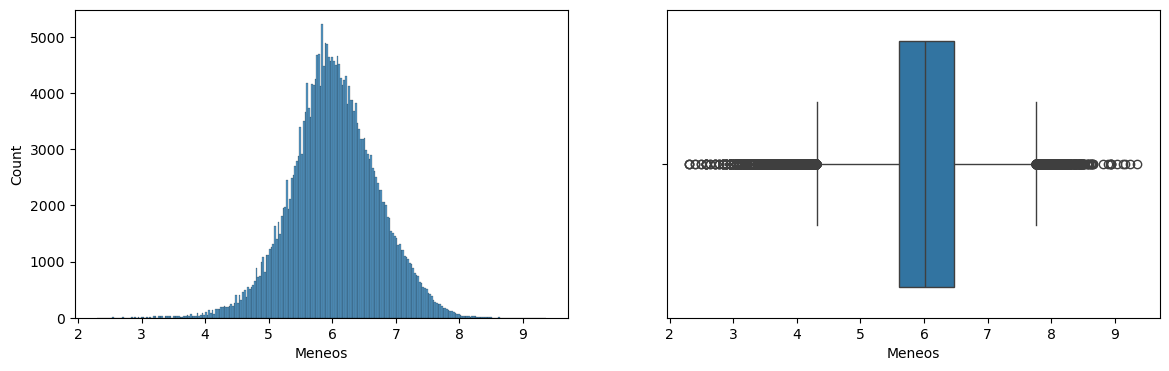

In [12]:
plot_numeric(df_tt, "Meneos", transform=(np.log))

In [13]:
df_tt["Meneos"].describe()

count    148706.0000000
mean        526.5026092
std         374.8080908
min          50.0000000
25%         267.0000000
50%         418.0000000
75%         669.0000000
max        2989.0000000
Name: Meneos, dtype: float64

In [14]:
ric = 714-281

lim_inf = 281 - 1.5*ric
lim_sup = 714 + 1.5*ric

print(lim_inf, lim_sup)

-368.5 1363.5


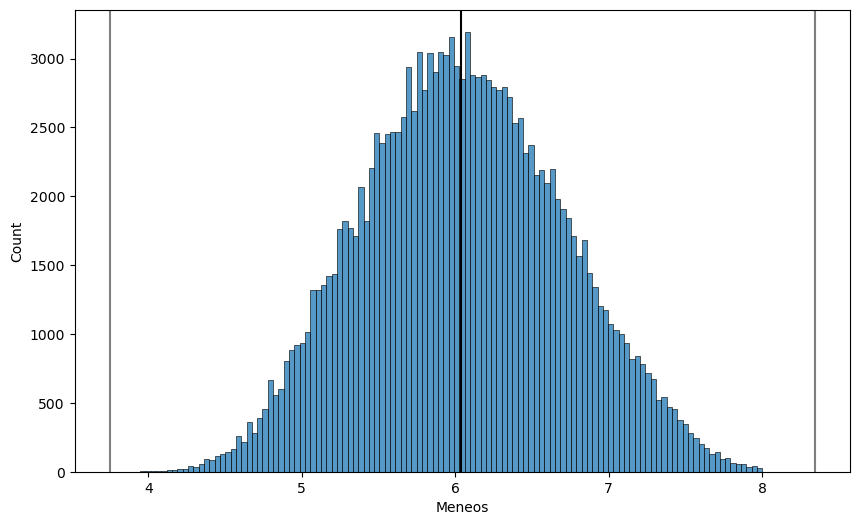

In [15]:
plt.figure(figsize = (10,6))

stats = df_tt["Meneos"].apply(np.log).describe()

median = stats["50%"]

Q1 = stats["25%"]
Q3 = stats["75%"]

ric = Q3 - Q1

lim_l = Q1 - ric*2
lim_r = Q3 + ric*2

sns.histplot(df_tt["Meneos"].apply(np.log))

plt.axvline(median, color = "black")
plt.axvline(lim_l, color="black", alpha = 0.5)
plt.axvline(lim_r, color="black", alpha = 0.5)

plt.show()

In [18]:
lim_l

3.7501778549442912

In [17]:
df_tt.shape

(148706, 7)

In [16]:
df_tt = df_tt[df_tt["Meneos"].between(50, 3000)]

df_tt

,Titular,URL,Meneos,Clicks,Negativos,Comentarios,Karma
1,El pelotazo de los curas salesianos con una pi...,https://old.meneame.net/story/pelotazo-curas-s...,73,336.0,3.0,20.0,441.0
2,Países Bajos no participa en el segundo ensayo...,https://old.meneame.net/story/paises-bajos-no-...,123,1275.0,3.0,39.0,460.0
3,Todos los israelíes están entrenados en hasbar...,https://old.meneame.net/story/todos-israelies-...,117,1256.0,5.0,24.0,410.0
4,Cuando Einstein llamó “fascistas” a los gobern...,https://old.meneame.net/story/cuando-einstein-...,260,415.0,2.0,17.0,461.0
5,"Vetiver: conoce qué es, para qué sirve, usos y...",https://old.meneame.net/story/vetiver-conoce-s...,64,595.0,1.0,34.0,436.0
...,...,...,...,...,...,...,...
193672,"Yu Chan, la primera tortuga biónica devuelta a...",https://old.meneame.net/story/yu-chan-primera-...,290,4378.0,1.0,37.0,536.0
193674,Un mayordomo que aparca la bici y la deja niqu...,https://old.meneame.net/story/mayordomo-aparca...,667,17305.0,0.0,59.0,655.0
193675,¿Un melenudo nueva imagen de Pantene?,https://old.meneame.net/story/melenudo-nueva-i...,1220,21493.0,4.0,113.0,605.0
193678,En todo el Sistema Solar,https://old.meneame.net/story/en-todo-el-siste...,400,8567.0,0.0,18.0,654.0


# Negativos #

In [ ]:
plt.figure(figsize = (10,6))

stats = df_tt["Negativos"].describe()

median = stats["50%"]

Q1 = stats["25%"]
Q3 = stats["75%"]

ric = Q3 - Q1

lim_l = Q1 - ric*2
lim_r = Q3 + ric*2

sns.histplot(df_tt["Negativos"])

plt.axvline(median, color = "black")
plt.axvline(lim_l, color="black", alpha = 0.5)
plt.axvline(lim_r, color="black", alpha = 0.5)

plt.show()

In [20]:
df["Negativos"].describe()

count    274369.0000000
mean          4.3537426
std           8.5602146
min           0.0000000
25%           0.0000000
50%           2.0000000
75%           5.0000000
max         246.0000000
Name: Negativos, dtype: float64

In [ ]:
px.histogram(df_tt["Negativos"], marginal="box")

In [ ]:
px.histogram(df_tt["Negativos"].apply(np.log), marginal="box")

In [23]:
df_tt = df_tt[df_tt["Negativos"] <= 13]

df_tt.head(3)

,Titular,URL,Meneos,Clicks,Negativos,Comentarios,Karma
1,El pelotazo de los curas salesianos con una pi...,https://old.meneame.net/story/pelotazo-curas-s...,73,336.0,3.0,20.0,441.0
2,Países Bajos no participa en el segundo ensayo...,https://old.meneame.net/story/paises-bajos-no-...,123,1275.0,3.0,39.0,460.0
3,Todos los israelíes están entrenados en hasbar...,https://old.meneame.net/story/todos-israelies-...,117,1256.0,5.0,24.0,410.0


# Comentarios # 

In [ ]:
px.histogram(df_tt["Comentarios"], marginal="box")

In [88]:
df["Comentarios"].describe()

count    274367.0000000
mean         74.3390167
std          70.1521330
min           0.0000000
25%          31.0000000
50%          54.0000000
75%          93.0000000
max        2718.0000000
Name: Comentarios, dtype: float64

In [116]:
stats = df_tt["Comentarios"].describe()

ric = stats["75%"] - stats["25%"]

lim_inf = stats["25%"] - 0.1*ric
lim_sup = stats["75%"] + 1.5*ric

print(lim_inf, lim_sup)

31.0 161.0


In [97]:
df_tt = df_tt[df_tt["Comentarios"].between(10, 150)]

df_tt.shape

(153136, 8)

# Karma #

In [ ]:
px.histogram(df_tt["Karma"], marginal="box")

In [118]:
stats = df_tt["Karma"].describe()

ric = stats["75%"] - stats["25%"]

lim_inf = stats["25%"] - 1*ric
lim_sup = stats["75%"] + 1*ric

print(lim_inf, lim_sup)

185.0 710.0


In [114]:
stats

count    274367.0000000
mean        513.6326891
std         164.6902817
min         -11.0000000
25%         386.0000000
50%         498.0000000
75%         622.0000000
max        6937.0000000
Name: Karma, dtype: float64

In [119]:
df_tt = df_tt[df_tt["Karma"].between(230, 700)]

df_tt.shape

(148764, 8)

## Clicks ##

In [ ]:
px.histogram(df_tt["Clicks"].apply(np.log), marginal="box")

In [12]:
lim_inf_clicks = np.exp(5.572154)

lim_sup_clicks = np.exp(10.54392)

print(lim_inf_clicks, lim_sup_clicks)

262.99999153724815 37946.0237001653


In [13]:
df_tt = df_tt[df_tt["Clicks"].between(263, 37946)]

df_tt.head()

,Titular,URL,Meneos,Clicks,Negativos,Comentarios,Karma,Delay_horas
1,El pelotazo de los curas salesianos con una pi...,https://old.meneame.net/story/pelotazo-curas-s...,73,336.0,3.0,20.0,441.0,Entre 1 y 3 horas
2,Países Bajos no participa en el segundo ensayo...,https://old.meneame.net/story/paises-bajos-no-...,123,1275.0,3.0,39.0,460.0,Menos de 1 hora
3,Todos los israelíes están entrenados en hasbar...,https://old.meneame.net/story/todos-israelies-...,117,1256.0,5.0,24.0,410.0,Entre 3 y 6 horas
4,Cuando Einstein llamó “fascistas” a los gobern...,https://old.meneame.net/story/cuando-einstein-...,260,415.0,2.0,17.0,461.0,Entre 6 y 9 horas
5,"Vetiver: conoce qué es, para qué sirve, usos y...",https://old.meneame.net/story/vetiver-conoce-s...,64,595.0,1.0,34.0,436.0,Más de 9 horas


## ***VISUALIZACIONES***

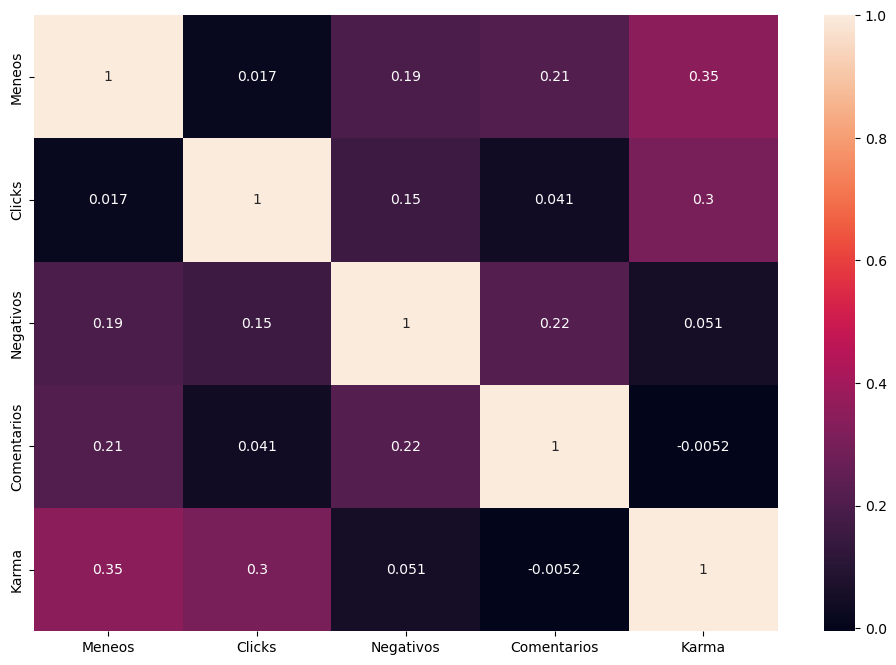

In [5]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = df_tt._get_numeric_data().corr(), annot = True)
plt.show()

## PREPROCESAMIENTO ##

In [6]:
df_tt.head(3)

,Titular,URL,Meneos,Clicks,Negativos,Comentarios,Karma
1,El pelotazo de los curas salesianos con una pi...,https://old.meneame.net/story/pelotazo-curas-s...,73,336.0,3.0,20.0,441.0
2,Países Bajos no participa en el segundo ensayo...,https://old.meneame.net/story/paises-bajos-no-...,123,1275.0,3.0,39.0,460.0
3,Todos los israelíes están entrenados en hasbar...,https://old.meneame.net/story/todos-israelies-...,117,1256.0,5.0,24.0,410.0


In [7]:
modelos = [LinearRegression(),
            KNeighborsRegressor(),
            RadiusNeighborsRegressor(),
            DecisionTreeRegressor(),
            RandomForestRegressor(),
            SVR(),
            AdaBoostRegressor(),
            GradientBoostingRegressor()]

In [27]:
# train, test split

X = df_tt.iloc[:, 2:].drop(["Clicks"], axis = 1)
y = df_tt["Clicks"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

y_train = y_train.values.reshape(-1)
y_test = y_test.values.reshape(-1)

# y_scaler = MinMaxScaler()
# y_train = y_scaler.fit_transform(y_train)
# y_test = y_scaler.transform(y_test)

datos_modelos = list()

for model in modelos:

    model.fit(X_train, y_train)
    yhat = model.predict(X_test)

    # y_test_inv = y_scaler.inverse_transform(y_test.reshape(-1, 1))
    # yhat_inv = y_scaler.inverse_transform(yhat.reshape(-1, 1))

    #Metricas
    mae = mean_absolute_error(y_test, yhat)
    mse = mean_squared_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    datos_modelos.append([str(model).strip("()"), model, mae, mse, r2])

df_modelo = pd.DataFrame(data = datos_modelos, columns = ["name", "model", "mae", "mse", "r2"])

df_modelo.sort_values("r2", ascending = False)



,name,model,mae,mse,r2
7,GradientBoostingRegressor,([DecisionTreeRegressor(criterion='friedman_ms...,2844.6789585,1.7096026e+07,0.1689334
0,LinearRegression,LinearRegression(),2953.8392039,1.7893198e+07,0.1301815
4,RandomForestRegressor,"(DecisionTreeRegressor(max_features=1.0, rando...",3006.7651689,1.8649797e+07,0.0934019
2,RadiusNeighborsRegressor,RadiusNeighborsRegressor(),3193.7383464,2.0363025e+07,0.0101190
1,KNeighborsRegressor,KNeighborsRegressor(),3097.3822608,2.0377658e+07,0.0094077
5,SVR,SVR(),2762.4069403,2.0564322e+07,0.0003337
6,AdaBoostRegressor,"(DecisionTreeRegressor(max_depth=3, random_sta...",3731.3037108,2.2189016e+07,-0.0786454
3,DecisionTreeRegressor,DecisionTreeRegressor(),4010.2680721,3.6897764e+07,-0.7936625


In [14]:
list_knn = list()

for k in range(1, 200):
    
    # Modelo
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    
    # Predicciones
    yhat = model.predict(X_test)

    y_test_inv = y_scaler.inverse_transform(y_test.reshape(-1, 1))
    yhat_inv = y_scaler.inverse_transform(yhat.reshape(-1, 1))

    #Metricas
    mae = mean_absolute_error( y_test_inv, yhat_inv)
    mse = mean_squared_error( y_test_inv, yhat_inv)
    r2 = r2_score(y_test_inv, yhat_inv)
    
    list_knn.append([k, mae, mse, r2])

In [15]:
df_knn = pd.DataFrame(data = list_knn, columns= ["k", "mae", "mse", "r2"])

df_knn.sort_values("r2", ascending=False)

,k,mae,mse,r2
194,195,2874.9882092,1.7252830e+07,0.1613109
196,197,2875.2567932,1.7253652e+07,0.1612709
197,198,2875.1752127,1.7253856e+07,0.1612610
195,196,2875.1637058,1.7254115e+07,0.1612484
198,199,2875.2421931,1.7254778e+07,0.1612162
...,...,...,...,...
4,5,3097.3822608,2.0377658e+07,0.0094077
3,4,3156.9382859,2.1256752e+07,-0.0333265
2,3,3245.1564006,2.2578093e+07,-0.0975591
1,2,3408.4653688,2.5337970e+07,-0.2317214


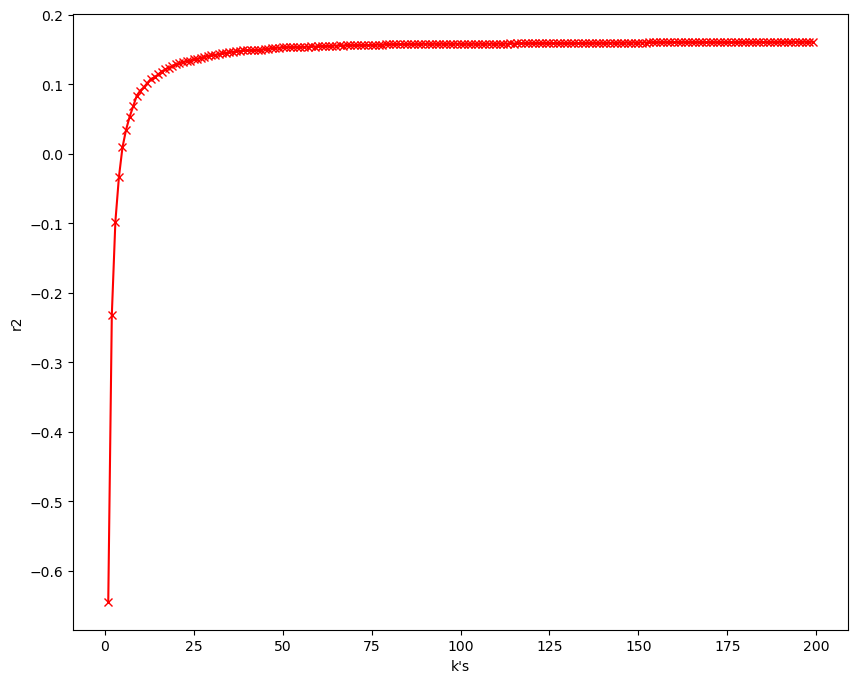

In [16]:
plt.figure(figsize = (10, 8))

plt.plot(df_knn["k"], df_knn["r2"], marker = "x", color = "red")

plt.xlabel("k's") 
plt.ylabel("r2") 

plt.show()

In [84]:
for i in datos_modelos:
    datos_modelos[i][1]

DecisionTreeRegressor()

In [93]:
import pickle
import os

try:
    os.mkdir("modelos_clicks")
except: pass

# Guardamos el mejor modelo y los escaladores

for i in range(len(datos_modelos)):
    modelo = datos_modelos[i][1]

    with open(file = f"modelos_clicks/{str(modelo)}.pkl", mode = "bw") as file:
        pickle.dump(modelo, file)
    
    print(f"modelos_clicks/{str(modelo)}.pkl")

modelos_clicks/DecisionTreeRegressor().pkl
modelos_clicks/RandomForestRegressor().pkl
modelos_clicks/SVR().pkl
modelos_clicks/AdaBoostRegressor().pkl
modelos_clicks/GradientBoostingRegressor().pkl


int

In [85]:
str(model)

'GradientBoostingRegressor()'